In [ ]:
#import os
#os.environ["XLA_PYTHON_CLIENT_MEM_FRACTION"] = "0.25"
import jax
import juniper as jp

from juniper.configurables import Gaussian
from juniper.configurables import LateralKernel
from juniper.dft import NeuralField
from juniper.statics import StaticGain
from juniper.sources import DemoInput

from demo.demo1 import demo1

In [2]:
print("Computing devices found by JAX:")
print(jax.local_devices())

Computing devices found by JAX:
[CpuDevice(id=0)]


In [ ]:
arch = jp.Architecture.get_arch()

<img src="demo/img/demo1_sketch.png" alt="demo sketch" width="400">

In [4]:
jp.Architecture.delete_arch()
arch = jp.Architecture.get_arch()
shape = (294, 447)

# Static steps
demo_input = DemoInput("in0", {"shape":shape, "sigma":(30,30), "amplitude":0, "center": (0,0)})
st0 = StaticGain("st0", {"factor": 6})

# field params
exc_kernel = Gaussian({"sigma": (30,30), "amplitude": 8, "normalized": True})
inh_kernel = Gaussian({"sigma": (55,55), "amplitude": -1.5, "normalized": True})
nf_kernel = LateralKernel({"kernels": [exc_kernel, inh_kernel]})
# Dynamic steps
nf0 = NeuralField("Attention Field", {"shape": shape, "resting_level": -5, "global_inhibition": -0.00, "tau": 0.05,  "input_noise_gain": 0, "sigmoid": "AbsSigmoid", "beta": 100, "theta":0, "LateralKernel": nf_kernel})
nf1 = NeuralField("Action Field", {"shape": shape, "resting_level": -5, "global_inhibition": -0.00, "tau": 0.1, "input_noise_gain": 0, "sigmoid": "AbsSigmoid", "beta": 100, "theta":0, "LateralKernel": nf_kernel})

# connections
demo_input >> nf0
nf0 >> st0
st0 >> nf1

arch.compile()

Loading saved buffers...


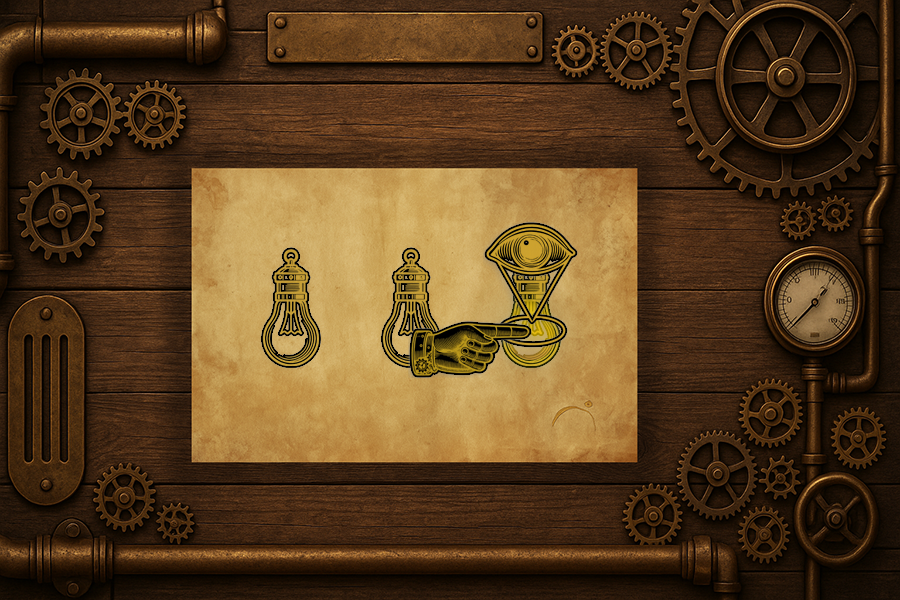

In [5]:
num_steps = 60
demo = demo1(arch, eye_field="Attention Field", hand_field="Action Field")
recording = demo.run(num_steps)

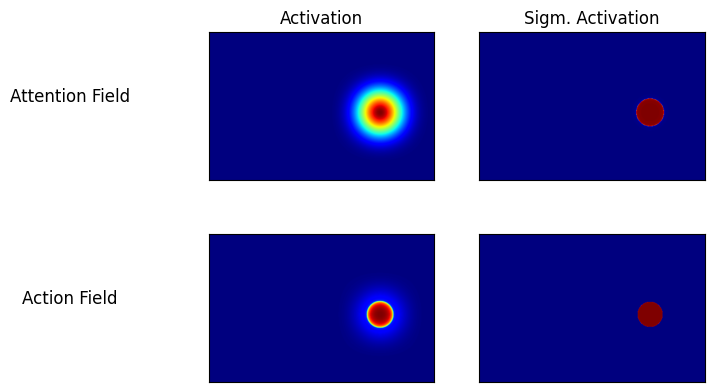

In [6]:
demo.plot()